In [23]:
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import json
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re
from collections import Counter
import nltk

In [24]:
df = pd.read_csv("dataset.csv")
df

,caption,ownerFullName,ownerUsername,url,commentsCount,firstComment,likesCount,timestamp,queryTag
0,Luxury in liquid form 🖤🤍\n\nFrom left to right...,Agave Amigos,agave.amigos,https://www.instagram.com/p/DGfAUmNzKH5/,0,NaN,16,2025-02-25T05:42:20.000Z,NaN
1,"Prickly on the outside, smooth on the inside 🌵...",Agave Amigos,agave.amigos,https://www.instagram.com/p/DNPnGexTbg1/,0,NaN,15,2025-08-12T05:53:06.000Z,NaN
2,this and a perfect sunset 🌅🥥🤎,Agave Amigos,agave.amigos,https://www.instagram.com/p/DK3iI4JzIW1/,1,hm,20,2025-06-14T04:25:10.000Z,NaN
3,Mini Clase Azul disposables available for pre-...,Agave Amigos,agave.amigos,https://www.instagram.com/p/DM3BrpQJpKZ/,37,Hm,213,2025-08-02T16:44:21.000Z,NaN
4,approved by the one and only Tita Small and yo...,Agave Amigos,agave.amigos,https://www.instagram.com/p/DHSMv4MzPLN/,3,Hm,100,2025-03-17T02:52:11.000Z,NaN
5,"Golden hour, but make it tequila. 🌅🥃",Agave Amigos,agave.amigos,https://www.instagram.com/p/DGFWOhPTi0g/,4,Hm,18,2025-02-15T06:33:29.000Z,NaN
6,A trio of smooth sophistication. Which one’s y...,Agave Amigos,agave.amigos,https://www.instagram.com/p/DGFUo26TGCI/,0,NaN,6,2025-02-15T06:19:36.000Z,NaN
7,Big shoutout to @laureen for the epic unboxing...,Agave Amigos,agave.amigos,https://www.instagram.com/p/C-6g1R8SJ7t/,0,NaN,32,2024-08-21T02:00:53.000Z,NaN
8,Mandala 2024 Dia De Muertos 💀🧡,Agave Amigos,agave.amigos,https://www.instagram.com/p/DGsaxO3zHHH/,0,NaN,43,2025-03-02T10:43:33.000Z,NaN
9,Weekends with @janinamanipol and @sebgilbert a...,Agave Amigos,agave.amigos,https://www.instagram.com/p/C8lZZMwyTOq/,4,🤍🥃,41,2024-06-24T04:04:07.000Z,NaN


Data Cleaning Process

In [25]:
# Removing irrelevant columns
del df['ownerFullName']
del df['ownerUsername']
del df['queryTag']

In [26]:
df

,caption,url,commentsCount,firstComment,likesCount,timestamp
0,Luxury in liquid form 🖤🤍\n\nFrom left to right...,https://www.instagram.com/p/DGfAUmNzKH5/,0,NaN,16,2025-02-25T05:42:20.000Z
1,"Prickly on the outside, smooth on the inside 🌵...",https://www.instagram.com/p/DNPnGexTbg1/,0,NaN,15,2025-08-12T05:53:06.000Z
2,this and a perfect sunset 🌅🥥🤎,https://www.instagram.com/p/DK3iI4JzIW1/,1,hm,20,2025-06-14T04:25:10.000Z
3,Mini Clase Azul disposables available for pre-...,https://www.instagram.com/p/DM3BrpQJpKZ/,37,Hm,213,2025-08-02T16:44:21.000Z
4,approved by the one and only Tita Small and yo...,https://www.instagram.com/p/DHSMv4MzPLN/,3,Hm,100,2025-03-17T02:52:11.000Z
5,"Golden hour, but make it tequila. 🌅🥃",https://www.instagram.com/p/DGFWOhPTi0g/,4,Hm,18,2025-02-15T06:33:29.000Z
6,A trio of smooth sophistication. Which one’s y...,https://www.instagram.com/p/DGFUo26TGCI/,0,NaN,6,2025-02-15T06:19:36.000Z
7,Big shoutout to @laureen for the epic unboxing...,https://www.instagram.com/p/C-6g1R8SJ7t/,0,NaN,32,2024-08-21T02:00:53.000Z
8,Mandala 2024 Dia De Muertos 💀🧡,https://www.instagram.com/p/DGsaxO3zHHH/,0,NaN,43,2025-03-02T10:43:33.000Z
9,Weekends with @janinamanipol and @sebgilbert a...,https://www.instagram.com/p/C8lZZMwyTOq/,4,🤍🥃,41,2024-06-24T04:04:07.000Z


In [27]:
#Converting date column to correct format
df["timestamp"] = pd.to_datetime(df["timestamp"])

In [28]:
df["year"] = df["timestamp"].dt.year
df["month"] = df["timestamp"].dt.month
df["day"] = df["timestamp"].dt.day
df["hour"] = df["timestamp"].dt.hour
df

,caption,url,commentsCount,firstComment,likesCount,timestamp,year,month,day,hour
0,Luxury in liquid form 🖤🤍\n\nFrom left to right...,https://www.instagram.com/p/DGfAUmNzKH5/,0,NaN,16,2025-02-25 05:42:20+00:00,2025,2,25,5
1,"Prickly on the outside, smooth on the inside 🌵...",https://www.instagram.com/p/DNPnGexTbg1/,0,NaN,15,2025-08-12 05:53:06+00:00,2025,8,12,5
2,this and a perfect sunset 🌅🥥🤎,https://www.instagram.com/p/DK3iI4JzIW1/,1,hm,20,2025-06-14 04:25:10+00:00,2025,6,14,4
3,Mini Clase Azul disposables available for pre-...,https://www.instagram.com/p/DM3BrpQJpKZ/,37,Hm,213,2025-08-02 16:44:21+00:00,2025,8,2,16
4,approved by the one and only Tita Small and yo...,https://www.instagram.com/p/DHSMv4MzPLN/,3,Hm,100,2025-03-17 02:52:11+00:00,2025,3,17,2
5,"Golden hour, but make it tequila. 🌅🥃",https://www.instagram.com/p/DGFWOhPTi0g/,4,Hm,18,2025-02-15 06:33:29+00:00,2025,2,15,6
6,A trio of smooth sophistication. Which one’s y...,https://www.instagram.com/p/DGFUo26TGCI/,0,NaN,6,2025-02-15 06:19:36+00:00,2025,2,15,6
7,Big shoutout to @laureen for the epic unboxing...,https://www.instagram.com/p/C-6g1R8SJ7t/,0,NaN,32,2024-08-21 02:00:53+00:00,2024,8,21,2
8,Mandala 2024 Dia De Muertos 💀🧡,https://www.instagram.com/p/DGsaxO3zHHH/,0,NaN,43,2025-03-02 10:43:33+00:00,2025,3,2,10
9,Weekends with @janinamanipol and @sebgilbert a...,https://www.instagram.com/p/C8lZZMwyTOq/,4,🤍🥃,41,2024-06-24 04:04:07+00:00,2024,6,24,4


In [30]:
#Adding a column for weekday
df["weekday"] = df["timestamp"].dt.day_name()
df

,caption,url,commentsCount,firstComment,likesCount,timestamp,year,month,day,hour,weekday
0,Luxury in liquid form 🖤🤍\n\nFrom left to right...,https://www.instagram.com/p/DGfAUmNzKH5/,0,NaN,16,2025-02-25 05:42:20+00:00,2025,2,25,5,Tuesday
1,"Prickly on the outside, smooth on the inside 🌵...",https://www.instagram.com/p/DNPnGexTbg1/,0,NaN,15,2025-08-12 05:53:06+00:00,2025,8,12,5,Tuesday
2,this and a perfect sunset 🌅🥥🤎,https://www.instagram.com/p/DK3iI4JzIW1/,1,hm,20,2025-06-14 04:25:10+00:00,2025,6,14,4,Saturday
3,Mini Clase Azul disposables available for pre-...,https://www.instagram.com/p/DM3BrpQJpKZ/,37,Hm,213,2025-08-02 16:44:21+00:00,2025,8,2,16,Saturday
4,approved by the one and only Tita Small and yo...,https://www.instagram.com/p/DHSMv4MzPLN/,3,Hm,100,2025-03-17 02:52:11+00:00,2025,3,17,2,Monday
5,"Golden hour, but make it tequila. 🌅🥃",https://www.instagram.com/p/DGFWOhPTi0g/,4,Hm,18,2025-02-15 06:33:29+00:00,2025,2,15,6,Saturday
6,A trio of smooth sophistication. Which one’s y...,https://www.instagram.com/p/DGFUo26TGCI/,0,NaN,6,2025-02-15 06:19:36+00:00,2025,2,15,6,Saturday
7,Big shoutout to @laureen for the epic unboxing...,https://www.instagram.com/p/C-6g1R8SJ7t/,0,NaN,32,2024-08-21 02:00:53+00:00,2024,8,21,2,Wednesday
8,Mandala 2024 Dia De Muertos 💀🧡,https://www.instagram.com/p/DGsaxO3zHHH/,0,NaN,43,2025-03-02 10:43:33+00:00,2025,3,2,10,Sunday
9,Weekends with @janinamanipol and @sebgilbert a...,https://www.instagram.com/p/C8lZZMwyTOq/,4,🤍🥃,41,2024-06-24 04:04:07+00:00,2024,6,24,4,Monday


In [31]:
df = df.drop('timestamp', axis=1)
df

,caption,url,commentsCount,firstComment,likesCount,year,month,day,hour,weekday
0,Luxury in liquid form 🖤🤍\n\nFrom left to right...,https://www.instagram.com/p/DGfAUmNzKH5/,0,NaN,16,2025,2,25,5,Tuesday
1,"Prickly on the outside, smooth on the inside 🌵...",https://www.instagram.com/p/DNPnGexTbg1/,0,NaN,15,2025,8,12,5,Tuesday
2,this and a perfect sunset 🌅🥥🤎,https://www.instagram.com/p/DK3iI4JzIW1/,1,hm,20,2025,6,14,4,Saturday
3,Mini Clase Azul disposables available for pre-...,https://www.instagram.com/p/DM3BrpQJpKZ/,37,Hm,213,2025,8,2,16,Saturday
4,approved by the one and only Tita Small and yo...,https://www.instagram.com/p/DHSMv4MzPLN/,3,Hm,100,2025,3,17,2,Monday
5,"Golden hour, but make it tequila. 🌅🥃",https://www.instagram.com/p/DGFWOhPTi0g/,4,Hm,18,2025,2,15,6,Saturday
6,A trio of smooth sophistication. Which one’s y...,https://www.instagram.com/p/DGFUo26TGCI/,0,NaN,6,2025,2,15,6,Saturday
7,Big shoutout to @laureen for the epic unboxing...,https://www.instagram.com/p/C-6g1R8SJ7t/,0,NaN,32,2024,8,21,2,Wednesday
8,Mandala 2024 Dia De Muertos 💀🧡,https://www.instagram.com/p/DGsaxO3zHHH/,0,NaN,43,2025,3,2,10,Sunday
9,Weekends with @janinamanipol and @sebgilbert a...,https://www.instagram.com/p/C8lZZMwyTOq/,4,🤍🥃,41,2024,6,24,4,Monday


In [39]:
#Correctly arranging order of weekday
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df["weekday"] = pd.Categorical(df["weekday"], categories=weekday_order, ordered=True)
df_grouped = df.groupby("weekday")["likesCount"].mean().reindex(weekday_order)

Data Analysis

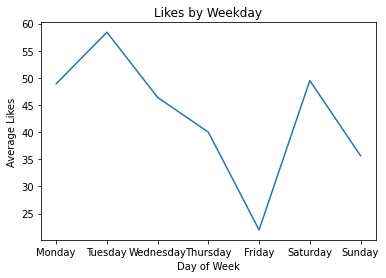

In [46]:
#Which day of the week gets most likes?
plt.plot(df_grouped.index, df_grouped.values)
plt.xlabel("Day of Week")
plt.ylabel("Average Likes")
plt.title("Likes by Weekday")
plt.show()

In [ ]:
#Engagement efficiency. Average likes for each day of the week
df.groupby("weekday")["likesCount"].mean()

In [41]:
#How many posts have there been for each weekday?
post_counts = df["weekday"].value_counts().reindex(
    ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
)

print(post_counts)

Monday       11
Tuesday      10
Wednesday     5
Thursday     13
Friday        1
Saturday     10
Sunday        6
Name: weekday, dtype: int64


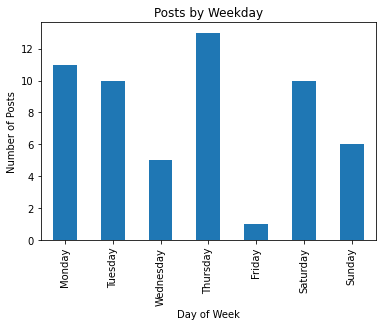

In [42]:
#Plotting number of posts for each weekday
post_counts.plot(kind="bar")
plt.xlabel("Day of Week")
plt.ylabel("Number of Posts")
plt.title("Posts by Weekday")
plt.show()

Text(0.5, 1.0, 'Likes by Hour')

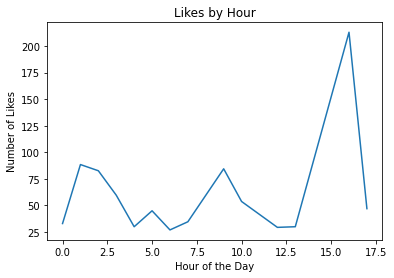

In [45]:
#What's the best time of the day to post?
plt.plot(df.groupby(["hour"]).mean()['likesCount'])
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Likes")
plt.title("Likes by Hour")

In [ ]:
#High likes drives high comments
correlation_value = df['likesCount'].corr(df['commentsCount'])
print(f"Correlation between col1 and col2: {correlation_value}")

In [60]:
#Like-Comment ratio
df["like_comment_ratio"] = df["likesCount"] / (df["commentsCount"]+1)
df

,caption,url,commentsCount,firstComment,likesCount,year,month,day,hour,weekday,like_comment_ratio
27,✨ Arte Azul Blanco ✨\n\nHints of citrus and mi...,https://www.instagram.com/p/C9_MFcFz1g6/,3,Ang arte!,33,2024,7,29,0,Monday,8.250000
30,prep for halloween with a hauntingly delicious...,https://www.instagram.com/p/DBFzmcnv1Ud/,0,NaN,48,2024,10,14,4,Monday,48.000000
13,Introducing Afamado Añejo 🌟 Smooth & balanced ...,https://www.instagram.com/p/DDo57oYTtRf/,1,how much and height of bottle,29,2024,12,16,12,Monday,14.500000
35,Featuring the Clase Azul Gold with taste notes...,https://www.instagram.com/p/C1AINbqv1Ai/,0,NaN,47,2023,12,18,17,Monday,47.000000
9,Weekends with @janinamanipol and @sebgilbert a...,https://www.instagram.com/p/C8lZZMwyTOq/,4,🤍🥃,41,2024,6,24,4,Monday,8.200000
43,Back to the classics ✨ thank you @janinamanipo...,https://www.instagram.com/p/C7vEITRPMyU/,1,@yappitsme,85,2024,6,3,1,Monday,42.500000
39,Durango at it’s finest 👀,https://www.instagram.com/p/CzleFXqvFIb/,0,NaN,42,2023,11,13,12,Monday,42.000000
45,"🥂 Sip, Savor, and Save! 🍻 Our liquor paradise ...",https://www.instagram.com/p/CxDVUsRhyvu/,1,🫡🤩,36,2023,9,11,12,Monday,18.000000
4,approved by the one and only Tita Small and yo...,https://www.instagram.com/p/DHSMv4MzPLN/,3,Hm,100,2025,3,17,2,Monday,25.000000
47,"Sippin' on Clase Azul Durango, because life is...",https://www.instagram.com/p/Cx5hLLeSq90/,0,NaN,30,2023,10,2,13,Monday,30.000000


In [61]:
df_sorted = df.sort_values(by='like_comment_ratio', ascending=True)
df_sorted
#A high like/comment ratio might suggest “passive” engagement, while a lower ratio means posts spark conversation.

,caption,url,commentsCount,firstComment,likesCount,year,month,day,hour,weekday,like_comment_ratio
50,✨ Chula Parranda Boot Reposado and Blanco ✨\n\...,https://www.instagram.com/p/C8tgoVWOVXN/,6,Hm,18,2024,6,27,7,Thursday,2.571429
19,Amor Mío Tequila\n\nCrafted from 100% blue aga...,https://www.instagram.com/p/DFKxejDz2ik/,2,Hm po,10,2025,1,23,12,Thursday,3.333333
5,"Golden hour, but make it tequila. 🌅🥃",https://www.instagram.com/p/DGFWOhPTi0g/,4,Hm,18,2025,2,15,6,Saturday,3.600000
17,Mala Vida: ‘Bad Life’ never tasted so good. Ma...,https://www.instagram.com/p/DFKxvjGzRXl/,0,NaN,5,2025,1,23,12,Thursday,5.000000
3,Mini Clase Azul disposables available for pre-...,https://www.instagram.com/p/DM3BrpQJpKZ/,37,Hm,213,2025,8,2,16,Saturday,5.605263
6,A trio of smooth sophistication. Which one’s y...,https://www.instagram.com/p/DGFUo26TGCI/,0,NaN,6,2025,2,15,6,Saturday,6.000000
28,✨ Dulce Amargura ✨\n\nFrom left to right:\nRep...,https://www.instagram.com/p/C9qrrPOTD97/,12,Hm thanks po,92,2024,7,21,1,Sunday,7.076923
10,"Aged to perfection, designed to impress - La C...",https://www.instagram.com/p/DHxRwTiT1oP/,2,how much,22,2025,3,29,4,Saturday,7.333333
22,Elevate your collection with the limited editi...,https://www.instagram.com/p/DHxkTqVz9K1/,2,Can you deliver ?,22,2025,3,29,7,Saturday,7.333333
12,Bringing the perfect balance of taste and trad...,https://www.instagram.com/p/DDllG5JT6N0/,0,NaN,8,2024,12,15,5,Sunday,8.000000


Caption Analysis

In [ ]:
#Extracting number of words for each post
df["caption_length"] = df["caption"].str.split().str.len()
df

Text(0.5, 1.0, 'Likes by Length of Caption')

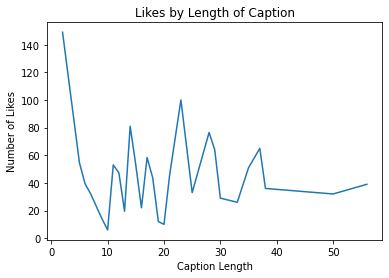

In [64]:
#Number of likes vs length of caption
plt.plot(df.groupby(["caption_length"]).mean()['likesCount'])
plt.xlabel("Caption Length")
plt.ylabel("Number of Likes")
plt.title("Likes by Length of Caption")
#Caption length does not matter

In [68]:
#Identify most frequent words in captions
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/stevenwhang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [70]:
def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'http\S+', '', text)  # remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # remove punctuation/numbers
    words = text.split()  # split into words
    words = [word for word in words if word not in stop_words]  # remove stopwords
    return words

# Apply it
df['cleaned_caption'] = df['caption'].apply(clean_text)
df

,caption,url,commentsCount,firstComment,likesCount,year,month,day,hour,weekday,like_comment_ratio,caption_length,cleaned_caption
27,✨ Arte Azul Blanco ✨\n\nHints of citrus and mi...,https://www.instagram.com/p/C9_MFcFz1g6/,3,Ang arte!,33,2024,7,29,0,Monday,8.250000,25,"[arte, azul, blanco, hints, citrus, minerals, ..."
30,prep for halloween with a hauntingly delicious...,https://www.instagram.com/p/DBFzmcnv1Ud/,0,NaN,48,2024,10,14,4,Monday,48.000000,18,"[prep, halloween, hauntingly, delicious, sip, ..."
13,Introducing Afamado Añejo 🌟 Smooth & balanced ...,https://www.instagram.com/p/DDo57oYTtRf/,1,how much and height of bottle,29,2024,12,16,12,Monday,14.500000,30,"[introducing, afamado, aejo, smooth, balanced,..."
35,Featuring the Clase Azul Gold with taste notes...,https://www.instagram.com/p/C1AINbqv1Ai/,0,NaN,47,2023,12,18,17,Monday,47.000000,17,"[featuring, clase, azul, gold, taste, notes, t..."
9,Weekends with @janinamanipol and @sebgilbert a...,https://www.instagram.com/p/C8lZZMwyTOq/,4,🤍🥃,41,2024,6,24,4,Monday,8.200000,18,"[weekends, janinamanipol, sebgilbert, course, ..."
43,Back to the classics ✨ thank you @janinamanipo...,https://www.instagram.com/p/C7vEITRPMyU/,1,@yappitsme,85,2024,6,3,1,Monday,42.500000,12,"[back, classics, thank, janinamanipol, photo]"
39,Durango at it’s finest 👀,https://www.instagram.com/p/CzleFXqvFIb/,0,NaN,42,2023,11,13,12,Monday,42.000000,5,"[durango, finest]"
45,"🥂 Sip, Savor, and Save! 🍻 Our liquor paradise ...",https://www.instagram.com/p/CxDVUsRhyvu/,1,🫡🤩,36,2023,9,11,12,Monday,18.000000,28,"[sip, savor, save, liquor, paradise, coming, s..."
4,approved by the one and only Tita Small and yo...,https://www.instagram.com/p/DHSMv4MzPLN/,3,Hm,100,2025,3,17,2,Monday,25.000000,23,"[approved, one, tita, small, agave, amiga, ps,..."
47,"Sippin' on Clase Azul Durango, because life is...",https://www.instagram.com/p/Cx5hLLeSq90/,0,NaN,30,2023,10,2,13,Monday,30.000000,15,"[sippin, clase, azul, durango, life, better, t..."


In [71]:
all_words = [word for caption in df['cleaned_caption'] for word in caption]

In [72]:
word_freq = Counter(all_words)

# Most common words
most_common = word_freq.most_common(20)  # top 20 keywords
print(most_common)

[('azul', 15), ('reposado', 13), ('anejo', 13), ('clase', 11), ('dm', 11), ('tequila', 11), ('available', 9), ('taste', 9), ('agave', 9), ('inquiries', 9), ('left', 8), ('right', 8), ('orders', 8), ('blanco', 7), ('notes', 7), ('bottles', 7), ('sip', 6), ('mandala', 6), ('aejo', 6), ('bottle', 5)]


Text(0.5, 1.0, 'Likes by Month')

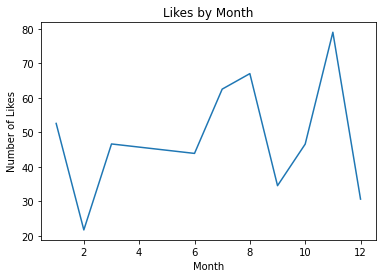

In [74]:
#Average likes per month. Is the business seasonal?

plt.plot(df.groupby(["month"]).mean()['likesCount'])
plt.xlabel("Month")
plt.ylabel("Number of Likes")
plt.title("Likes by Month")

#Business picks up right before Christmas and summer time.

Post Performance Comparison

In [ ]:
#Best performing posts
bestposts = df[df['likesCount'] > df['likesCount'].quantile(0.95)]
bestposts

In [ ]:
#Worst performing posts
worstposts = df[df['likesCount'] < df['likesCount'].quantile(0.05)]
worstposts

Recommendations to the business for possible growth: 

- Post on Fridays. There is little data to support that posting on a Friday could drive engagement.
- Post during peak hours of 8AM and/or 3PM. The most engagement based on data was during these 2 timeframes.
- Use hashtags. Engagement may grow with the use of hashtags as it feeds into Instagram's algorithm. 
- Use high quality pictures and vibrant backgrounds. Best performing posts have these 2 things in common as compared to the worst peroforming posts.
- A shift towards posting more about vapes (rather than tequila) will provide more engagement to the instagram page